In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import seaborn as sns



In [12]:
def XGBoost_test(path, cv=5, test_size=0.3):
    # Import dataset
    df_dataset = pd.read_csv(path)

    # Encode Labels for numeric classification
    label_encoder = LabelEncoder()
    df_dataset['Label'] = label_encoder.fit_transform(df_dataset['Label'])

    # Set a random state for sampling
    RANDOM_STATE_SEED = np.random.randint(123)
    print(f'Random Seed:{RANDOM_STATE_SEED}')
    
    # Split dataset in train and test
    train, test = train_test_split(df_dataset, test_size=test_size, random_state=RANDOM_STATE_SEED)
    
    # Count how many instances there are in each label
    print(df_dataset["Label"].value_counts())

    # Separate in X and y for better classification
    y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
    X_train = train.values

    print(f'Tipo X_train: {type(X_train)} Tipo y_train: {type(y_train)} Shape X_train:{X_train.shape} Shape y_train: {y_train.shape}')

    y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
    X_test = test.values

    print(f'Tipo X_test: {type(X_test)} Tipo y_test: {type(y_test)} Shape X_test:{X_test.shape} Shape y_test: {y_test.shape}')
    
    # Define the used classification model
    model = xgb.XGBClassifier()

    # Define the grid for hyperparameter tuning
    hyperparameters = {
        'learning_rate': [0.9, 0.7, 0.5, 0.3, 0.1]
    }

    # Define the final classification model
    clf = GridSearchCV(
        estimator = model,
        param_grid = hyperparameters,
        cv=cv,
        verbose=1,
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the model to the training data
    %time clf.fit(X=X_train, y=y_train)

    # Print best paramenters
    print("Accuracy score on Validation set: \n")
    print(clf.best_score_ )
    print("---------------")
    print("Best performing hyperparameters on Validation set: ")
    print(clf.best_params_)
    print("---------------")
    print(clf.best_estimator_)

    # Test model on test data and print metrics
    model = clf.best_estimator_
    predictions = model.predict(X_test)
    print(classification_report(y_test,predictions,digits=10))
    print(f'Accuracy: {accuracy_score(y_test, predictions)}')

    # Print Confusion Matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    
    sns.heatmap(cf_matrix, annot=True)     

Random Seed:50
Label
11    67297
9     41214
17     3633
5      3599
18     2646
15     2327
10     1493
0       956
20      892
21      890
14      201
3        53
1        30
22       20
6        18
4        11
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: count, dtype: int64
Tipo X_train: <class 'numpy.ndarray'> Tipo y_train: <class 'numpy.ndarray'> Shape X_train:(87726, 38) Shape y_train: (87726,)
Tipo X_test: <class 'numpy.ndarray'> Tipo y_test: <class 'numpy.ndarray'> Shape X_test:(37597, 38) Shape y_test: (37597,)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/xg

CPU times: user 37min 13s, sys: 5.57 s, total: 37min 18s
Wall time: 6min 6s
Accuracy score on Validation set: 

nan
---------------
Best performing hyperparameters on Validation set: 
{'learning_rate': 0.9}
---------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
              pre

/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


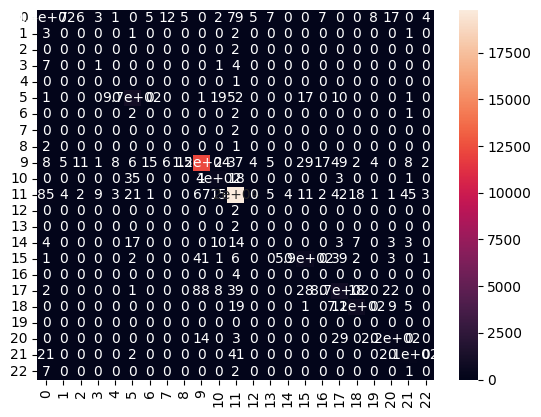

In [15]:
XGBoost_test('/home/mintssj/Downloads/datasets/filtered/NSL_KDD_all_attacks.csv', cv=10)